# Model Comparison
By: Griffin Hosseinzadeh (2025 May 7)

## sigma = 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We'll start by generating some synthetic data from a slightly more complicated model than usual. The true underlying model will be a straight line plus a sinusoid. Imagine, for example, that these data are measurements of the brightness of a variable star over time. It could have short-timescale oscillations in brightness while also increasing in average brightness over the long term. Let's model this as
$$ y_3(x) = m x + b + a\sin(2\pi x) $$
where the three model parameters are the slope $m$, the intercept $b$, and the amplitude of the oscillations $a$.
We're going to compare this model with a simpler model without the oscillations:
$$ y_2(x) = m x + b $$
When we have noisy data, we may not be able to tell the difference between these two models.

First, write both these models down as functions. We will want to call them later on.

In [ ]:
def model3(x, m, b, a):
    return   m*x +b + a*np.sin(2*np.pi*x)

def model2(x, m, b):
    return   m*x +b

# I would like to preemptively apologize for the mess this notebook is about to be

Generate 100 random points in the range $0<x<1$ and evaulate the true model ($y_3$) at these points given the parameters below. Then add Gaussian noise to each point using the value of $\sigma$ below. Plot your synthetic data set (with error bars) and visually compare it with your two proposed models.

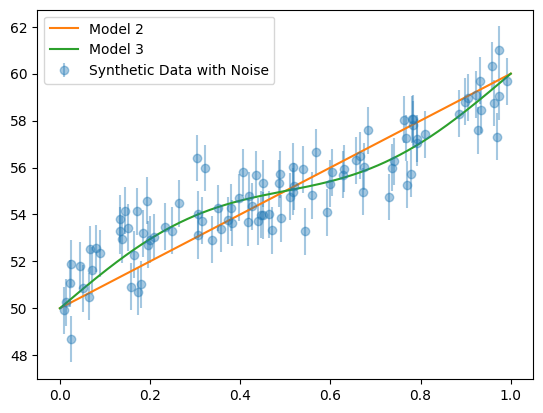

In [16]:
N = 100       # number of points
m_true = 10.  # slope
b_true = 50.  # intercept
a_true = 1.   # amplitude
sigma = 1.    # scatter

rng = np.random.default_rng(seed=13579)
x =  rng.uniform(0, 1, N)
y_noise_free = model3(x, m_true, b_true, a_true)
y =  y_noise_free + rng.normal(0, sigma, N)
dy =  np.full(N, sigma)

x_model =  np.linspace(0, 1, 500)
y_model2 =  model2(x_model, m_true, b_true)
y_model3 =  model3(x_model, m_true, b_true, a_true)

plt.errorbar(x, y, yerr=dy,label='Synthetic Data with Noise',fmt='o',alpha=0.4)
plt.plot(x_model, y_model2,  label='Model 2')
plt.plot(x_model, y_model3,  label='Model 3')
plt.legend()
plt.show()

From now on, we are pretending we don't know which model is true, or what the true values of the parameters are. We have a data set, and we want to figure out which model is a a better fit, and whether it is significantly better or not, given the different numbers of parameters.

For each model, write down functions for the logarithm of the prior, likelihood, and posterior. **Make sure your prior is properly normalized.** Use these functions to calculate the Bayesian evidence for each model. This is very similar to what we did in the Bayesian statistics exercise, with one additional step: numerical integration (`np.trapezoid`) of the entire posterior grid.

In [ ]:
m_min = 0.5  # technically cannot be =0 for a log-uniform prior
m_max = 99.5
b_min = 0.5
b_max = 99.5


def log_prior2(theta):
    m, b = theta
    if m_min <= m <= m_max and b_min <= b <= b_max:
        # Properly normalized uniform prior
        log_prior_m = -np.log(m_max - m_min)
        log_prior_b = -np.log(b_max - b_min)

        #testing priors 
        #log_prior_m = -(np.log(m_max) - np.log(m_min))
        #log_prior_b = -(np.log(b_max) - np.log(b_min))
        #log_prior_m = (np.log(m_max) - np.log(m_min))
        #log_prior_b = (np.log(b_max) - np.log(b_min))


        return log_prior_m + log_prior_b
    else:
        return -np.inf  # log(0)

def log_likelihood2(theta, x, y, dy):
    m, b = theta
    # Gaussian likelihood
    chi2 = np.sum(((y - model2(x,m,b)) / dy) ** 2)
    log_like = -0.5 * (chi2 + np.sum(np.log(2 * np.pi * dy ** 2))) #i assume we're including the ocnstant in there this time
    return log_like

def log_posterior2(theta, x, y, dy):
    lp = log_prior2(theta)
    if not np.isfinite(lp):
        return -np.inf 
    return lp + log_likelihood2(theta, x, y, dy)


m_range2 =  np.linspace(m_min, m_max, 100)
b_range2 =  np.linspace(b_min, b_max, 100)
theta2 = []
posterior_values = []

for b_val in b_range2: #Im aware this is inefficient but it works for now

    for m_val in m_range2:
       
        theta = [m_val, b_val]
        theta2.append(theta) # creating list of theta pairs
        
        post_val = np.exp(log_posterior2(theta, x, y, dy)) #posterior for each pair
        posterior_values.append(post_val)
theta2 = np.array(theta2)
posterior_values = np.array(posterior_values)

posterior_grid2 = np.zeros((len(b_range2), len(m_range2)))
index = 0
#converting to grid , dim 1 is b  and dim 2 is m
for i in range(len(b_range2)):
    for j in range(len(m_range2)):
        posterior_grid2[i, j] = posterior_values[index]
        index += 1


#integrate over each dim
integral_m = np.trapz(posterior_grid2, m_range2, axis=1)
evidence2 = np.trapz(integral_m, b_range2)
print(evidence2)


#assuming this method is correct we proceed with the notebook


4.947688132031888e-69


In [21]:
a_min = 0.1
a_max = 10.


def log_prior3(theta):
    m, b, a = theta
    if m_min <= m <= m_max and b_min <= b <= b_max and a_min <= a <= a_max:
        # Properly normalized uniform prior for all three parameters
        log_prior_m = -np.log(m_max - m_min)
        log_prior_b = -np.log(b_max - b_min)
        log_prior_a = -np.log(a_max - a_min)
        return log_prior_m + log_prior_b + log_prior_a
    else:
        return -np.inf

def log_likelihood3(theta, x, y, dy):
    m, b, a = theta
    chi2 = np.sum(((y - model3(x,m,b,a)) / dy) ** 2)
    log_like = -0.5 * (chi2 + np.sum(np.log(2 * np.pi * dy ** 2)))
    return log_like

def log_posterior3(theta, x, y, dy):
    lp = log_prior3(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood3(theta, x, y, dy)

# since there are 3 parameters I assume its a 3 dimensional grid an we're supposed ot come up with and a range also
m_range3 = np.linspace(m_min, m_max, 100)
b_range3 = np.linspace(b_min, b_max, 100)
a_range3 = np.linspace(a_min, a_max, 100)


theta3 = []
posterior_values3 = []

for a_val in a_range3:
    for b_val in b_range3:
        for m_val in m_range3:
         
            theta = [m_val, b_val, a_val]
            theta3.append(theta)
            
            post_val = np.exp(log_posterior3(theta, x, y, dy))
            posterior_values3.append(post_val)

theta3 = np.array(theta3)
posterior_values3 = np.array(posterior_values3)

#  dims are [a, b, m]
posterior_grid3 = np.zeros((len(a_range3), len(b_range3), len(m_range3)))
index = 0
for i in range(len(a_range3)):
    for j in range(len(b_range3)):
        for k in range(len(m_range3)):
            posterior_grid3[i, j, k] = posterior_values3[index]
            index += 1


integral_m = np.trapz(posterior_grid3, m_range3, axis=2)
integral_mb = np.trapz(integral_m, b_range3, axis=1)
evidence3 = np.trapz(integral_mb, a_range3)
print(evidence3)

8.219673710280255e-68


Calculate the odds ratio for the 3-parameter model compared to the 2-parameter model. What does this number tell you? Does it agree with your intuition from the plot you made above?

In [23]:
odds_ratio = evidence3 / evidence2
odds_ratio

16.613160512412183

### Since it is greater than 10 there is strong evidence for model3

Now calculate the Akaike and Bayesian information criteria (AIC & BIC). For the sake of time, do not worry about determining the actual maximum-likelihood parameter values. Just use the true parameter values we used to synthesize the data at the beginning of this notebook. (Presumably those should be close to the maximum-likelihood values.) What do the AIC and BIC tell you? Do they agree with the odds ratio and/or your intuition?

In [25]:

def log_likelihood(y_pred, y_obs, dy):# so i dont have to deal with the moel specifics
    return -0.5 * np.sum(((y_obs - y_pred) / dy)**2 + np.log(2 * np.pi * dy**2))


log_like2 = log_likelihood(model2(x, m_true, b_true), y, dy)
log_like3 = log_likelihood(model3(x, m_true, b_true, a_true), y, dy)
# complete



#n params
k2 = 2 
k3 = 3  


aic2 = -2 * log_like2 + 2 * k2 + (2 * k2 * (k2 + 1)) / (N - k2 - 1)
aic3 = -2 * log_like3 + 2 * k3 + (2 * k3 * (k3 + 1)) / (N - k3 - 1)
print(aic2, aic3, aic2 - aic3)

bic2 = -2 * log_like2 + k2 * np.log(N)
bic3 = -2 * log_like3 + k3 * np.log(N)
print(bic2, bic3, bic2 - bic3)

338.56560676942803 290.53524314954115 48.030363619886884
343.65223580119806 298.1007537075054 45.55148209369264


### The difference in AIC (48) is much greater than 10, which  indicates "strong evidence" for Model 3.

### Similarly, the difference in BIC (45.5) also exceeds 10, again indicating "strong evidence" for Model 3.

### this is supported by the odds ratio and holds up when inspecting the overlayed models and data


Now repeat this entire notebook using a different data set with increased noise. Either duplicate this entire notebook (File > Duplicate), in which case you need to add that new notebook to the GitHub repository, or copy all the code cells above and paste them below. *(Yes, you could just change the number and rerun the notebook, but we want to see a record of both.)*

This time, increase $\sigma$ to 5. Comment on your results, specifically whether or not you can distinguish between the two models, and whether you think that is reasonable or not.

*Complete*

## sigma =5

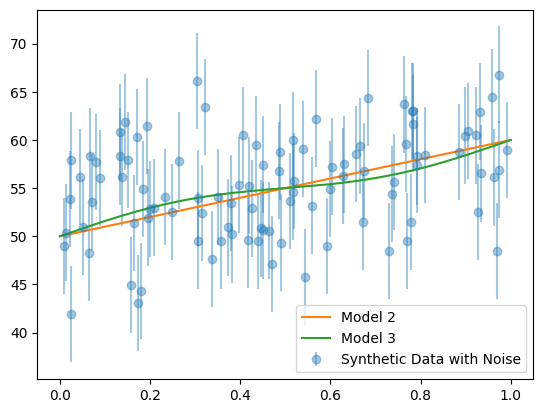

6.39495791205729e-135
7.638644647491548e-136


In [27]:
def model3(x, m, b, a):
    return   m*x +b + a*np.sin(2*np.pi*x)

def model2(x, m, b):
    return   m*x +b

N = 100       # number of points
m_true = 10.  # slope
b_true = 50.  # intercept
a_true = 1.   # amplitude
sigma = 5.    # scatter

rng = np.random.default_rng(seed=13579)
x =  rng.uniform(0, 1, N)
y_noise_free = model3(x, m_true, b_true, a_true)
y =  y_noise_free + rng.normal(0, sigma, N)
dy =  np.full(N, sigma)

x_model =  np.linspace(0, 1, 500)
y_model2 =  model2(x_model, m_true, b_true)
y_model3 =  model3(x_model, m_true, b_true, a_true)

plt.errorbar(x, y, yerr=dy,label='Synthetic Data with Noise',fmt='o',alpha=0.4)
plt.plot(x_model, y_model2,  label='Model 2')
plt.plot(x_model, y_model3,  label='Model 3')
plt.legend()
plt.show()

m_min = 0.5  # technically cannot be =0 for a log-uniform prior
m_max = 99.5
b_min = 0.5
b_max = 99.5


def log_prior2(theta):
    m, b = theta
    if m_min <= m <= m_max and b_min <= b <= b_max:
        # Properly normalized uniform prior
        log_prior_m = -np.log(m_max - m_min)
        log_prior_b = -np.log(b_max - b_min)

        #testing priors 
        #log_prior_m = -(np.log(m_max) - np.log(m_min))
        #log_prior_b = -(np.log(b_max) - np.log(b_min))
        #log_prior_m = (np.log(m_max) - np.log(m_min))
        #log_prior_b = (np.log(b_max) - np.log(b_min))


        return log_prior_m + log_prior_b
    else:
        return -np.inf  # log(0)

def log_likelihood2(theta, x, y, dy):
    m, b = theta
    # Gaussian likelihood
    chi2 = np.sum(((y - model2(x,m,b)) / dy) ** 2)
    log_like = -0.5 * (chi2 + np.sum(np.log(2 * np.pi * dy ** 2))) #i assume we're including the ocnstant in there this time
    return log_like

def log_posterior2(theta, x, y, dy):
    lp = log_prior2(theta)
    if not np.isfinite(lp):
        return -np.inf 
    return lp + log_likelihood2(theta, x, y, dy)


m_range2 =  np.linspace(m_min, m_max, 100)
b_range2 =  np.linspace(b_min, b_max, 100)
theta2 = []
posterior_values = []

for b_val in b_range2: #Im aware this is inefficient but it works for now

    for m_val in m_range2:
       
        theta = [m_val, b_val]
        theta2.append(theta) # creating list of theta pairs
        
        post_val = np.exp(log_posterior2(theta, x, y, dy)) #posterior for each pair
        posterior_values.append(post_val)
theta2 = np.array(theta2)
posterior_values = np.array(posterior_values)

posterior_grid2 = np.zeros((len(b_range2), len(m_range2)))
index = 0
#converting to grid , dim 1 is b  and dim 2 is m
for i in range(len(b_range2)):
    for j in range(len(m_range2)):
        posterior_grid2[i, j] = posterior_values[index]
        index += 1


#integrate over each dim
integral_m = np.trapz(posterior_grid2, m_range2, axis=1)
evidence2 = np.trapz(integral_m, b_range2)
print(evidence2)


#assuming this method is correct we proceed with the notebook

a_min = 0.1
a_max = 10.


def log_prior3(theta):
    m, b, a = theta
    if m_min <= m <= m_max and b_min <= b <= b_max and a_min <= a <= a_max:
        # Properly normalized uniform prior for all three parameters
        log_prior_m = -np.log(m_max - m_min)
        log_prior_b = -np.log(b_max - b_min)
        log_prior_a = -np.log(a_max - a_min)
        return log_prior_m + log_prior_b + log_prior_a
    else:
        return -np.inf

def log_likelihood3(theta, x, y, dy):
    m, b, a = theta
    chi2 = np.sum(((y - model3(x,m,b,a)) / dy) ** 2)
    log_like = -0.5 * (chi2 + np.sum(np.log(2 * np.pi * dy ** 2)))
    return log_like

def log_posterior3(theta, x, y, dy):
    lp = log_prior3(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood3(theta, x, y, dy)

# since there are 3 parameters I assume its a 3 dimensional grid an we're supposed ot come up with and a range also
m_range3 = np.linspace(m_min, m_max, 100)
b_range3 = np.linspace(b_min, b_max, 100)
a_range3 = np.linspace(a_min, a_max, 100)


theta3 = []
posterior_values3 = []

for a_val in a_range3:
    for b_val in b_range3:
        for m_val in m_range3:
         
            theta = [m_val, b_val, a_val]
            theta3.append(theta)
            
            post_val = np.exp(log_posterior3(theta, x, y, dy))
            posterior_values3.append(post_val)

theta3 = np.array(theta3)
posterior_values3 = np.array(posterior_values3)

#  dims are [a, b, m]
posterior_grid3 = np.zeros((len(a_range3), len(b_range3), len(m_range3)))
index = 0
for i in range(len(a_range3)):
    for j in range(len(b_range3)):
        for k in range(len(m_range3)):
            posterior_grid3[i, j, k] = posterior_values3[index]
            index += 1


integral_m = np.trapz(posterior_grid3, m_range3, axis=2)
integral_mb = np.trapz(integral_m, b_range3, axis=1)
evidence3 = np.trapz(integral_mb, a_range3)
print(evidence3)

In [28]:
odds_ratio = evidence3 / evidence2
odds_ratio

0.11944792682824956

### This provides strong evidence for the linear model or model 2


In [29]:

def log_likelihood(y_pred, y_obs, dy):# so i dont have to deal with the moel specifics
    return -0.5 * np.sum(((y_obs - y_pred) / dy)**2 + np.log(2 * np.pi * dy**2))


log_like2 = log_likelihood(model2(x, m_true, b_true), y, dy)
log_like3 = log_likelihood(model3(x, m_true, b_true, a_true), y, dy)
# complete



#n params
k2 = 2 
k3 = 3  


aic2 = -2 * log_like2 + 2 * k2 + (2 * k2 * (k2 + 1)) / (N - k2 - 1)
aic3 = -2 * log_like3 + 2 * k3 + (2 * k3 * (k3 + 1)) / (N - k3 - 1)
print(aic2, aic3, aic2 - aic3)

bic2 = -2 * log_like2 + k2 * np.log(N)
bic3 = -2 * log_like3 + k3 * np.log(N)
print(bic2, bic3, bic2 - bic3)

612.932696523359 612.4228256363614 0.5098708869976463
618.019325555129 619.9883361943257 -1.9690106391967674


### Again the low and even negative deltas of AIC and BIC support the idea that the linear model is a better fit however it is still not a very good fit as demosntrated by the low magnitude. This is likely because of the much higher uncertainty

## It is clear that model 3 approximates the data much better oinly when uncertainty is low , once a higher uncertainty is introduced the finer details of the sin curve gets lost 